In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'tomato/train'
valid_path = 'tomato/val'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [25]:
  # useful for getting number of output classes
folders = glob('tomato/train/*')
folders

['tomato/train\\Tomato___Bacterial_spot',
 'tomato/train\\Tomato___Early_blight',
 'tomato/train\\Tomato___healthy',
 'tomato/train\\Tomato___Late_blight',
 'tomato/train\\Tomato___Leaf_Mold',
 'tomato/train\\Tomato___Septoria_leaf_spot',
 'tomato/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'tomato/train\\Tomato___Target_Spot',
 'tomato/train\\Tomato___Tomato_mosaic_virus',
 'tomato/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
len(training_set)

Found 10000 images belonging to 10 classes.


313

In [13]:
test_set = test_datagen.flow_from_directory('tomato/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 268s 850ms/step - accuracy: 0.7137 - loss: 2.0421 - val_accuracy: 0.7730 - val_loss: 2.0712


In [17]:
import matplotlib.pyplot as plt

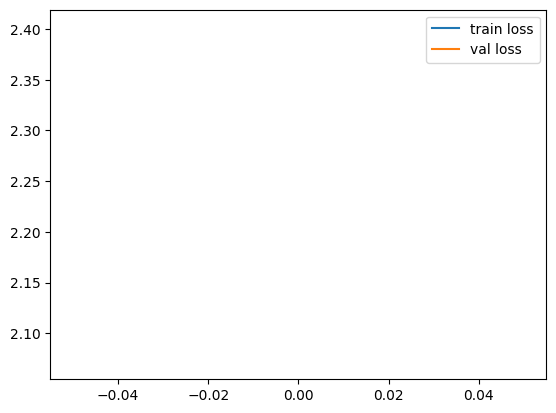

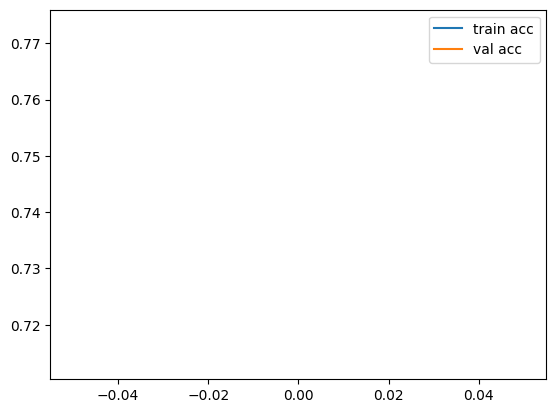

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:
y_pred = model.predict(test_set)

32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 568ms/step


In [22]:
y_pred

array([[1.61702272e-31, 4.23919967e-22, 2.33978452e-24, ...,
        2.14310262e-27, 2.19357364e-19, 6.84965119e-31],
       [5.53268611e-01, 7.48150470e-03, 1.10590551e-10, ...,
        1.12589387e-12, 2.13103732e-07, 6.20137596e-16],
       [4.45323466e-13, 3.26104505e-10, 5.54564084e-09, ...,
        1.69597639e-13, 9.70787531e-16, 7.54370145e-13],
       ...,
       [0.00000000e+00, 6.25368065e-26, 6.53962964e-22, ...,
        1.00000000e+00, 2.70110737e-19, 0.00000000e+00],
       [1.00000000e+00, 1.35718005e-14, 4.30150647e-15, ...,
        4.80369060e-17, 1.14835494e-19, 9.17598469e-25],
       [1.37816853e-22, 2.46758898e-20, 1.00000000e+00, ...,
        2.24274655e-30, 8.86994043e-20, 1.36690446e-17]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([3, 0, 6, 1, 5, 1, 3, 7, 7, 1, 9, 0, 0, 5, 5, 0, 0, 1, 3, 6, 7, 7,
       1, 8, 2, 3, 8, 4, 3, 0, 4, 6, 2, 8, 6, 7, 2, 4, 4, 0, 6, 3, 7, 3,
       3, 3, 3, 0, 6, 9, 2, 8, 0, 2, 2, 0, 4, 3, 3, 7, 6, 3, 3, 9, 7, 2,
       9, 3, 0, 2, 0, 5, 8, 5, 5, 3, 7, 4, 8, 0, 5, 3, 5, 1, 8, 5, 9, 0,
       8, 0, 8, 7, 1, 6, 9, 4, 0, 1, 5, 3, 7, 5, 8, 6, 8, 2, 5, 7, 6, 5,
       3, 7, 9, 2, 9, 3, 7, 8, 3, 9, 8, 4, 2, 7, 4, 7, 3, 2, 3, 9, 3, 0,
       0, 6, 9, 1, 3, 2, 2, 8, 9, 3, 8, 6, 0, 4, 6, 1, 3, 3, 7, 2, 2, 2,
       2, 0, 3, 1, 1, 4, 3, 9, 2, 2, 6, 0, 2, 1, 8, 9, 4, 4, 1, 0, 6, 5,
       3, 5, 9, 2, 0, 5, 4, 8, 6, 3, 2, 6, 9, 9, 2, 4, 1, 0, 0, 6, 9, 8,
       6, 7, 0, 7, 6, 2, 3, 1, 2, 1, 5, 3, 3, 7, 3, 5, 6, 7, 3, 3, 0, 8,
       7, 6, 9, 7, 2, 7, 4, 1, 2, 1, 3, 4, 3, 7, 4, 2, 0, 8, 7, 9, 1, 5,
       3, 8, 0, 6, 5, 1, 2, 3, 6, 0, 7, 3, 9, 2, 9, 6, 9, 9, 7, 3, 8, 6,
       7, 0, 9, 0, 1, 5, 5, 9, 7, 1, 6, 5, 2, 7, 8, 6, 7, 1, 4, 1, 4, 1,
       3, 2, 1, 0, 5, 6, 3, 2, 3, 9, 7, 6, 8, 8, 0,